In [1]:
# Imports
import numpy as np
from collections import Counter  
from itertools import permutations
import matplotlib.pyplot as plt

## Set up
First, using our set up of the problem and the formula for the increments of the process in Conjecture 2, we code a function to perform a simulation of the problem.

In [50]:
# Function to simulate string numbers for a given n
# t is a stopping time for the chain in the case we wish to stop early
def string_numbers(n, return_T=False, tau=None, verbose=False):
    '''
        Function to simulate a single path of the string loops problem.
    
    Parameters:
        n (int): Number of strings in the bowl initially.
        return_T (bool): Whether to return T, the index of the final timestep.
        tau (int): A time to stop the chain early, None if not stopping early.
        verbose (bool): Whether to print out the state of the process at each time step.
    
    Returns:
        (int): The number of closed loops in the process.
        Also returns T if return_T = True.
    '''
    # If n = 1, return 1 (note that T=2 for n=1)
    if n == 1:
        if return_T:
            return 2, 1
        else:
            return 1
    
    # Initialise X_t, E_t, and S_t
    # Note that we represent both E_t and S_t via their indexes rather than the end object, i.e. e_i -> i
    X_t = 0 # Start with no closed loops
    E_t = set(range(1, 2 * n + 1)) # E_1 = {1,2,...,2n}
    S_t = {i: {2 * i - 1, 2 * i} for i in range(1, n + 1)} # S_1 = {{e_{2i-1}, e_{2i}}: i \in [n]}
    
    # Set a step counter
    T = 1
    
    # If verbose, print the initial state of the process
    if verbose:
        print(f"n={n}")
        print(f"X_1 = {X_t}")
        print(f"E_1 = {E_t}")
        print(f"S_1 = {S_t}")
    
    # If stopping time t not set, set it to what T should be to stop infinite loops
    if tau == None:
        tau = n + 1
    
    # Contiue until either there are no edges left, or we hit the stopping time
    while len(E_t) > 0 and T < tau:
        # Sample x_1 and x_2 and remove them from the list of ends
        x_1 = np.random.choice(list(E_t))
        E_t.remove(x_1)
        
        x_2 = np.random.choice(list(E_t))
        E_t.remove(x_2)
        
        # If verbose, print the sampled ends
        if verbose:
            print(f"(x_1,x_2) = ({x_1}, {x_2})")
        
        # Find the strings containing x_1 and x_2
        s_i_idx = None
        s_j_idx = None
        for i, s in S_t.items():
            if x_1 in s:
                s_i_idx = i
            if x_2 in s:
                s_j_idx = i
                
        # Check if there is a loop
        if s_i_idx is not None and s_i_idx == s_j_idx:
            # If loop, increment X_t by 1
            X_t += 1
            # Remove loop from S_t (not strictly necessary)
            del S_t[s_i_idx]
        else:
            # If no loop, merge the strings
            if s_i_idx is not None and s_j_idx is not None and s_i_idx != s_j_idx:
                S_t[s_i_idx] = (S_t[s_i_idx] | S_t[s_j_idx]) - {x_1,x_2}
                del S_t[s_j_idx]
                
        T += 1
        
        # If verbose, print the current state of the process
        if verbose:
            print(f"X_{T} = {X_t}")
            print(f"E_{T} = {E_t}")
            print(f"S_{T} = {S_t}")
            
        
    if return_T:
        return T, X_t
    else:
        return X_t
    
# Test
print(f"n=1: {string_numbers(1, return_T=True)}")
print("--------------------")
print(f"n=2: {string_numbers(2, return_T=True, verbose=True)}")
print("--------------------")
print(f"n=3: {string_numbers(3, return_T=True, verbose=False)}")

n=1: (2, 1)
--------------------
n=2
X_1 = 0
E_1 = {1, 2, 3, 4}
S_1 = {1: {1, 2}, 2: {3, 4}}
(x_1,x_2) = (1, 4)
X_2 = 0
E_2 = {2, 3}
S_2 = {1: {2, 3}}
(x_1,x_2) = (2, 3)
X_3 = 1
E_3 = set()
S_3 = {}
n=2: (3, 1)
--------------------
n=3: (4, 2)


In [51]:
# Test stopping times
print(f"n=2: {string_numbers(2, return_T=True, tau=2, verbose=True)}")
print("--------------------")
print(f"n=3: {string_numbers(3, return_T=True, tau=2, verbose=True)}")
print("--------------------")
print(f"n=4: {string_numbers(4, return_T=True, tau=2, verbose=True)}")

n=2
X_1 = 0
E_1 = {1, 2, 3, 4}
S_1 = {1: {1, 2}, 2: {3, 4}}
(x_1,x_2) = (4, 1)
X_2 = 0
E_2 = {2, 3}
S_2 = {2: {2, 3}}
(x_1,x_2) = (3, 2)
X_3 = 1
E_3 = set()
S_3 = {}
n=2: (3, 1)
--------------------
n=3
X_1 = 0
E_1 = {1, 2, 3, 4, 5, 6}
S_1 = {1: {1, 2}, 2: {3, 4}, 3: {5, 6}}
(x_1,x_2) = (5, 4)
X_2 = 0
E_2 = {1, 2, 3, 6}
S_2 = {1: {1, 2}, 3: {3, 6}}
(x_1,x_2) = (3, 2)
X_3 = 0
E_3 = {1, 6}
S_3 = {3: {1, 6}}
n=3: (3, 0)
--------------------
n=4
X_1 = 0
E_1 = {1, 2, 3, 4, 5, 6, 7, 8}
S_1 = {1: {1, 2}, 2: {3, 4}, 3: {5, 6}, 4: {8, 7}}
(x_1,x_2) = (7, 5)
X_2 = 0
E_2 = {1, 2, 3, 4, 6, 8}
S_2 = {1: {1, 2}, 2: {3, 4}, 4: {8, 6}}
n=4: (2, 0)


## Simulation
Now we create a function to simulate the string numbers problem a given number of times, and calculate an empirical estimate of the expected number of closed loops.

In [54]:
# Function to simulate the string numbers process and calculate an empirical average
def sim_string_numbers(n, return_T=False, tau=None, num_sims=5000):
    '''
    Function to simulate a large number of paths of the string loops problem, and 
    calculate an empirical estimate of the expected number of closed loops.
    
    Parameters:
        n (int): Number of strings in the bowl initially.
        return_T (bool): Whether to return the average T, the index of the final 
        timestep, over the simulations.
        tau (int): A time to stop the chain early, None if not stopping early.
        num_sims (int): Number of simulations to perform.
    
    Returns:
        (float): An empirical estimate of the expected number of closed loops.
        Also returns the average T if return_T = True.
    '''
    # Run simulations and store results
    if return_T:
        # Get the T values and simulation results
        T_values, sim_results = zip(*[string_numbers(n, return_T=return_T, tau=tau) for _ in range(num_sims)])
    else:
        # Get the simulation results
        sim_results = [string_numbers(n=n, tau=tau) for _ in range(num_sims)]
    # Return empirical mean
    if return_T:
        # Return the average T value and average simulation result
        return np.mean(T_values), np.mean(sim_results)
    else:
        # Return the average simulation result
        return np.mean(sim_results)

# Test
print(f"n=1: {sim_string_numbers(1, return_T=True)}")
print(f"n=2: {sim_string_numbers(2, return_T=True)}")
print(f"n=3: {sim_string_numbers(3, return_T=True)}")

# Test stopping times
print("--------------------")
print(f"n=2: {sim_string_numbers(2, tau=3)}")
print("--------------------")
print(f"n=3: {sim_string_numbers(3, tau=3)}")
print("--------------------")
print(f"n=4: {sim_string_numbers(4, tau=3)}")

n=1: (2.0, 1.0)
n=2: (3.0, 1.3316)
n=3: (4.0, 1.5346)
--------------------
n=2: 1.3352
--------------------
n=3: 0.5278
--------------------
n=4: 0.3356


## Conjecture 1
Now we use the code to justify Conjecture 1.

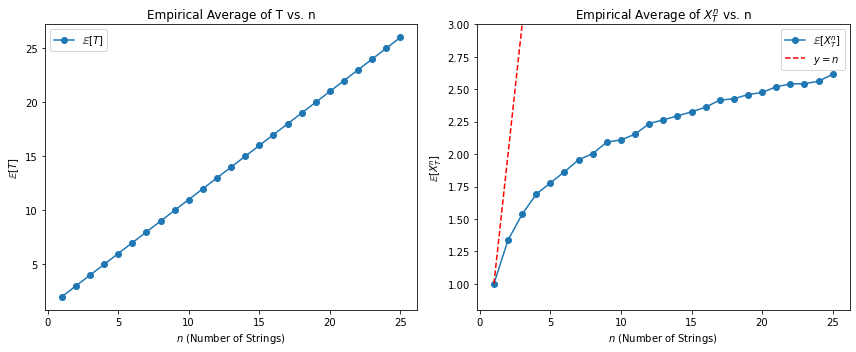

In [5]:
# Set largest n value to consider
n_max = 25
# Set number of simulations to do for each n
num_sims = 5000
# Get list of n values from 1 to n_max
n_values = list(range(1,n_max+1))

# Lists to store the mean T and X_T values for each n
mean_T_vals = []
mean_X_T_vals = []

# Loop over the n values
for n in n_values:
    # Get the simulation results
    mean_T, mean_X_T = sim_string_numbers(n, return_T=True, num_sims=num_sims)
    # Append the results to the lists
    mean_T_vals.append(mean_T)
    mean_X_T_vals.append(mean_X_T)
    
# Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot n vs T
axes[0].plot(n_values, mean_T_vals, marker='o', linestyle='-', label="$\mathbb{E}[T]$")
axes[0].set_title("Empirical Average of T vs. n")
axes[0].set_xlabel("$n$ (Number of Strings)")
axes[0].set_ylabel("$\mathbb{E}[T]$")
axes[0].legend()

# Plot n vs E[X_T] with line y=n
axes[1].plot(n_values, mean_X_T_vals, marker='o', linestyle='-', label="$\mathbb{E}[X^n_T]$")
axes[1].plot(n_values, n_values, linestyle='dashed', color='red', label="$y = n$")
axes[1].set_ylim([0.8, 3])
axes[1].set_title("Empirical Average of $X^n_T$ vs. n")
axes[1].set_xlabel("$n$ (Number of Strings)")
axes[1].set_ylabel("$\mathbb{E}[X^n_T]$")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

## Brute Force
Here we code a brute force approach to calculating the expected number of closed loops. The function finds all possible permutations of sampled ends in the process, calculates their final values for the process. This approach is extremely inefficient, and so is only feasible for very small values of $n$. 

In [65]:
# Function to find all possible paths and their final values
def find_unique_paths(n, tau=None):
    """
    Finds all unique paths for the string tying process.
    
    Parameters:
        n (int): The initial number of strings.
        tau (int): A time to stop the process early, None if not stopping early.
    
    Returns:
        (list): A list of all unique paths taken in the process.
        (list): The corresponding X_T values for each path.
    """
    
    # Generate all possible pairings of 2n ends
    ends = list(range(1, 2 * n + 1))
    all_pairings = list(permutations(ends, 2 * n))  # Generate all orders of tying
    
    # Lists to hold the unique paths and their corresponding final values
    unique_paths = []
    X_T_values = []

    # Loop through all possible paths
    for pairing in all_pairings:
        E_t = set(ends)  # Set of all open ends
        S_t = {i: {2 * i - 1, 2 * i} for i in range(1, n + 1)}  # Initial strings
        X_n_t = 0  # Number of closed loops
        T = 1  # Step counter
        # List to store the path
        path = []
        
        # Loop through each individual sample pairing in the current path
        for i in range(0, len(pairing), 2):
            # Stop if there are no ends left or reach the stopping time
            if len(E_t) == 0 or (tau is not None and T >= tau):
                break

            # Extract the samples from the current sample pair
            x1, x2 = pairing[i], pairing[i+1]
            
            # Check that the samples are valid
            if x1 not in E_t or x2 not in E_t:
                continue
            
            # Remove the samples from the set of ends
            E_t.remove(x1)
            E_t.remove(x2)
            # Append the pairing to the path
            path.append((x1, x2))
            
            # Adjust S_t and X_t as in the path simulation function
            s_i, s_j = None, None
            for idx, s in S_t.items():
                if x1 in s:
                    s_i = idx
                if x2 in s:
                    s_j = idx

            if s_i is not None and s_i == s_j:
                X_n_t += 1
                del S_t[s_i]  # Remove closed loop

            elif s_i is not None and s_j is not None and s_i != s_j:
                S_t[s_i] = (S_t[s_i] | S_t[s_j]) - {x1, x2}
                del S_t[s_j]
            
            # Increment the current time step
            T += 1

        # Append the path to the set of unique paths
        unique_paths.append(path)
        # Append the corresponding final value of the process to the final values list
        X_T_values.append(X_n_t)

    # Return all unique paths and their corresponding final values
    return unique_paths, X_T_values

# n=3
n = 3
unique_paths, X_T_values = find_unique_paths(n)

# Output the first few paths and their X_T values
for i in range(min(5,len(unique_paths))):  # Show only the first few paths
    print(f"Path {i+1}: {unique_paths[i]} -> X_T = {X_T_values[i]}")  
 
# Count occurrences of each X_T value
X_T_counts = Counter(X_T_values)

# Print summary of the number of paths for each X_T value
print("\nSummary of path counts by X_T value:")
for k, v in sorted(X_T_counts.items()):
    print(f"Number of paths with X_T = {k}: {v}")

Path 1: [(1, 2), (3, 4), (5, 6)] -> X_T = 3
Path 2: [(1, 2), (3, 4), (6, 5)] -> X_T = 3
Path 3: [(1, 2), (3, 5), (4, 6)] -> X_T = 2
Path 4: [(1, 2), (3, 5), (6, 4)] -> X_T = 2
Path 5: [(1, 2), (3, 6), (4, 5)] -> X_T = 2

Summary of path counts by X_T value:
Number of paths with X_T = 1: 384
Number of paths with X_T = 2: 288
Number of paths with X_T = 3: 48


Now we create a function to use the brute force method to calculate the exact value of the expected number of closed loops.

In [66]:
# Function to calculate the expected number of closed loops using brute force 
def calculate_eta_n(n, tau=None):
    """
    Finds the exact value of the expected number of closed loops using brute force.
    
    Parameters:
        n (int): The initial number of strings.
        tau (int): A time to stop the process early, None if not stopping early.
    
    Returns:
        (float): Expected number of closed loops.
    """
    # Get all possible final values for the process
    _, X_T_values = find_unique_paths(n, tau=tau)  # Get all unique paths and their corresponding X_T values
    
    # Compute eta_n as the empirical mean of X_T values
    eta_n = np.mean(X_T_values)
    
    return eta_n

# Example usage
n = 3
eta_n_value = calculate_eta_n(n)
print(f"Empirical eta_{n} = {eta_n_value}")

Empirical eta_3 = 1.5333333333333334


In [8]:
# Now use this for n=4 (to check conjecture 3)
n = 4
unique_paths, X_T_values = find_unique_paths(n)

# Output the first few paths and their X_T values
for i in range(min(5,len(unique_paths))):  # Show only the first few paths
    print(f"Path {i+1}: {unique_paths[i]} -> X_T = {X_T_values[i]}")  
 
# Count occurrences of each X_T value
X_T_counts = Counter(X_T_values)

# Print summary of the number of paths for each X_T value
print("\nSummary of path counts by X_T value:")
for k, v in sorted(X_T_counts.items()):
    print(f"Number of paths with X_T = {k}: {v}")
    
eta_n_value = calculate_eta_n(n)
print(f"Empirical eta_{n} = {eta_n_value}")

Path 1: [(1, 2), (3, 4), (5, 6), (7, 8)] -> X_T = 4
Path 2: [(1, 2), (3, 4), (5, 6), (8, 7)] -> X_T = 4
Path 3: [(1, 2), (3, 4), (5, 7), (6, 8)] -> X_T = 3
Path 4: [(1, 2), (3, 4), (5, 7), (8, 6)] -> X_T = 3
Path 5: [(1, 2), (3, 4), (5, 8), (6, 7)] -> X_T = 3

Summary of path counts by X_T value:
Number of paths with X_T = 1: 18432
Number of paths with X_T = 2: 16896
Number of paths with X_T = 3: 4608
Number of paths with X_T = 4: 384
Empirical eta_4 = 1.6761904761904762


## Conjecture 3
Now we use the code to justify conjecture 3.

In [9]:
# Function to calculate the recurrence values
def recurrence_value(n, eta_prev=None):
    """
    Calculates the expected number of closed loops using the recurrence relation
    from Conjecture 3.
    
    Parameters:
        n (int): The initial number of strings.
        eta_prev (float): The expected number of closed loops for n-1 (to speed
        up the code in the case we have the value).
    
    Returns:
        (float): Expected number of closed loops as calculated using the 
        recurrence relation.
    """
    # If we put in eta_{n-1}, we can calculate eta_n directly
    if eta_prev:
        return eta_prev + 1 / (2 * n - 1)
    
    # Otherwise we calculate it recursively
    if n == 1:
        return 1
    else:
        return recurrence_value(n-1) + 1 / (2 * n - 1)
    
# Function to get a list of recurrence values from 1 to n_max
def recurrence_values(n_max):
    """
    Calculates the expected number of closed loops using the recurrence relation
    from Conjecture 3 for a list of n values
    
    Parameters:
        n_max (int): The maximum initial number of strings to consider.
    
    Returns:
        (list): Expected number of closed loops as calculated using the 
        recurrence relation for n=1 to n_max.
    """
    # Initialise the list to have the first expected value in
    recursion_vals = [recurrence_value(1)]
    for n in range(2, n_max+1):
        # Calculate and append the next expected value, using the last one for efficiency
        recursion_vals.append(recurrence_value(n, recursion_vals[-1]))
        
    return recursion_vals
    
# Test
print(f"n=1: {recurrence_value(1)}")
print(f"n=2: {recurrence_value(2)}")
print(f"n=3: {recurrence_value(3)}")
print(f"n=4: {recurrence_value(4)}")
print(f"n=4 given eta_3: {recurrence_value(4,23/15)}")
print('--------------------')
print(f"n_max=5 {recurrence_values(5)}")

n=1: 1
n=2: 1.3333333333333333
n=3: 1.5333333333333332
n=4: 1.676190476190476
n=4 given eta_3: 1.6761904761904762
--------------------
n_max=5 [1, 1.3333333333333333, 1.5333333333333332, 1.676190476190476, 1.7873015873015872]


We use the above to compare the empirical expected number of closed loops with that given by the reccurence relation

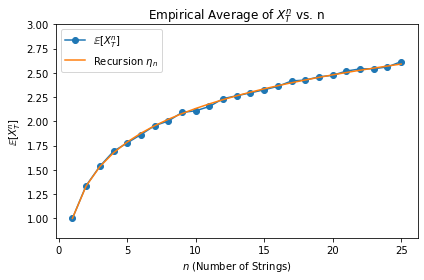

In [10]:
# Plot n vs empirical and recursion eta_n values (using simulated values above)
plt.plot(n_values, mean_X_T_vals, marker='o', linestyle='-', label="$\mathbb{E}[X^n_T]$")
plt.plot(n_values, recurrence_values(n_max), label='Recursion $\eta_n$')
plt.ylim([0.8, 3])
plt.title("Empirical Average of $X^n_T$ vs. n")
plt.xlabel("$n$ (Number of Strings)")
plt.ylabel("$\mathbb{E}[X^n_T]$")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

## Conjecture 4
Now we ue the code to justify conjecture 4.

In [11]:
# Function to calculate eta_n using the formula
def calc_eta_formula(n):
    """
    Calculates the expected number of closed loops using the formula in
    Conjecutre 4
    
    Parameters:
        n (int): The initial number of strings.
    
    Returns:
        (float): Expected number of closed loops as calculated using the 
        formula.
    """
    return sum([1 / (2 * m - 1) for m in range(1,n+1)])

# Test
print(f"n=1: {calc_eta_formula(1)}")
print(f"n=2: {calc_eta_formula(2)}")
print(f"n=3: {calc_eta_formula(3)}")
print(f"n=4: {calc_eta_formula(4)}")

n=1: 1.0
n=2: 1.3333333333333333
n=3: 1.5333333333333332
n=4: 1.676190476190476


We use the above to compare the empirical expected number of closed loops with that given by the formula.

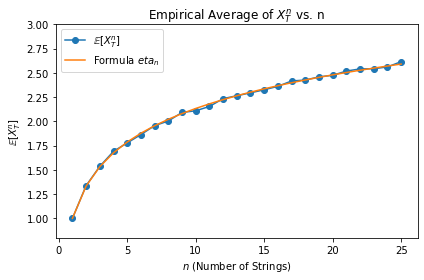

In [12]:
# Get expected values according to the formula
formula_values = [calc_eta_formula(n) for n in n_values]

# Plot n vs the empirical and formula eta_n values
plt.plot(n_values, mean_X_T_vals, marker='o', linestyle='-', label="$\mathbb{E}[X^n_T]$")
plt.plot(n_values, formula_values, label='Formula $eta_n$')
plt.ylim([0.8, 3])
plt.title("Empirical Average of $X^n_T$ vs. n")
plt.xlabel("$n$ (Number of Strings)")
plt.ylabel("$\mathbb{E}[X^n_T]$")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

## Final Check
We now do a final check for the review phase to verify that our findings work.

In [13]:
## Final Check
n = 8

print("## -- Simulation -- ##")
print(f"Simulation $eta_8$: {sim_string_numbers(n, return_T=True)}")

print("--------------------")
print("## Recurrence and Formula Values")
print(f"Recurrence $\eta_8$: {recurrence_value(n)}")
print(f"Formula $\eta_8$: {calc_eta_formula(n)}")

## -- Simulation -- ##
Simulation $eta_8$: (9.0, 2.0488)
--------------------
## Recurrence and Formula Values
Recurrence $\eta_8$: 2.0218004218004215
Formula $\eta_8$: 2.0218004218004215


## Extensions

### Stopping the Process
First we use brute force to see what happens when we stop at time step 2 when $n=3$.

In [67]:
# Set the number of strings n and stopping time tau
n = 3
tau = 2

# Get the paths and corresponding final values
unique_paths, X_T_values = find_unique_paths(n, tau)

# Output the first few paths and their X_T values
for i in range(min(5,len(unique_paths))):  # Show only the first few paths
    print(f"Path {i+1}: {unique_paths[i]} -> X_tau = {X_T_values[i]}")  
 
# Count occurrences of each X_T value
X_T_counts = Counter(X_T_values)

# Print summary of the number of paths for each X_T value
print("\nSummary of path counts by X_tau value:")
for k, v in sorted(X_T_counts.items()):
    print(f"Number of paths with X_tau = {k}: {v}")
    
# Calculate and print the emprical average number of closed loops by time t
emp_E_X_n_tau_val = calculate_eta_n(n, tau=tau)
print(f"Empirical E_X_n_tau = {emp_E_X_n_tau_val}")

Path 1: [(1, 2)] -> X_tau = 1
Path 2: [(1, 2)] -> X_tau = 1
Path 3: [(1, 2)] -> X_tau = 1
Path 4: [(1, 2)] -> X_tau = 1
Path 5: [(1, 2)] -> X_tau = 1

Summary of path counts by X_tau value:
Number of paths with X_tau = 0: 576
Number of paths with X_tau = 1: 144
Empirical E_X_n_tau = 0.2


Now we define a function to calculate the theoretical expected number of closed loops using the formula in Conjecture 5.

In [45]:
# Define function to calculate theoretical E[X^n_tau]
def calc_E_X_n_tau(n, tau):
    return calc_eta_formula(n) - calc_eta_formula(n+1-tau)

Now compare the theoretical and simulated expected numbers of closed loops by time step 5.

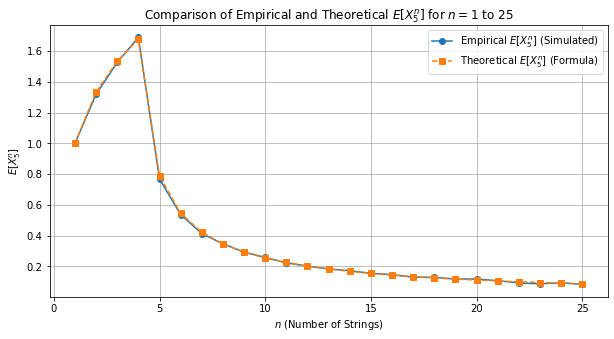

In [79]:
# Set the stopping time
tau = 5

# Get simulated expected values
empirical_E_X_n_tau = [sim_string_numbers(n, tau=tau) for n in n_values]

# Compute theoretical values using the formula
theoretical_E_X_n_tau = [calc_E_X_n_tau(n, tau) for n in n_values]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(n_values, empirical_E_X_n_tau, marker='o', linestyle='-', label="Empirical $E[X^n_{5}]$ (Simulated)")
plt.plot(n_values, theoretical_E_X_n_tau, marker='s', linestyle='--', label="Theoretical $E[X^n_{5}]$ (Formula)")
plt.xlabel("$n$ (Number of Strings)")
plt.ylabel("$E[X^n_{5}]$")
plt.title("Comparison of Empirical and Theoretical $E[X^n_{5}]$ for $n=1$ to $25$")
plt.legend()
plt.grid()
plt.show()

Now we plot the expected number of loops by time $\tau$ using the formula for $\tau \in \{1,2,...,10\}.$

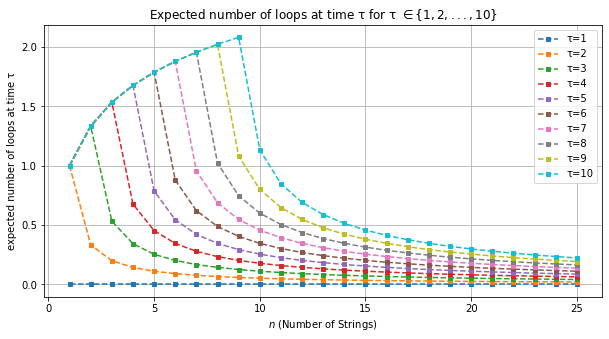

In [105]:
# Plot the results
plt.figure(figsize=(10, 5))

for tau in range(1,11):
    # Compute theoretical values using the formula
    plt.plot(n_values, [calc_E_X_n_tau(n, tau) for n in n_values], marker='s', markersize=4, linestyle='--', label=f"\u03C4={tau}")
    
plt.xlabel("$n$ (Number of Strings)")
plt.ylabel("expected number of loops at time \u03C4")
plt.title("Expected number of loops at time \u03C4 for \u03C4 $\in \{1,2,...,10\}$")
plt.legend()
plt.grid()
plt.show()

Now we verify that
$$
\eta_n - \eta_{n+1-\tau} = \sum_{m=\max(1,n+1-\tau)}^n \frac{1}{2m-1} 
$$

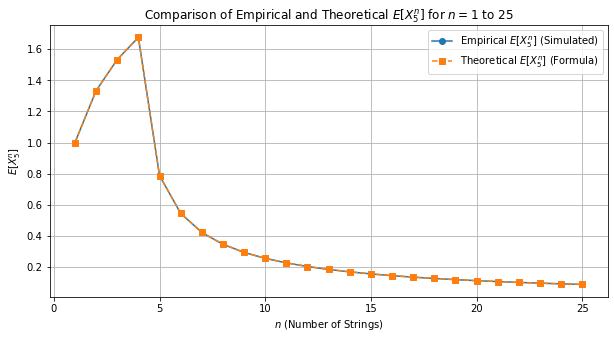

In [104]:
# Set stopping time
tau = 5

# Calculate the values from the sum for each n
sum_E_X_n_tau = [sum([1 / (2 * m - 1) for m in range(max(1,n+2-tau), n+1)]) for n in n_values]

# Compute theoretical values using the formula
theoretical_E_X_n_tau = [calc_E_X_n_tau(n, tau) for n in n_values]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(n_values, sum_E_X_n_tau, marker='o', linestyle='-', label="Empirical $E[X^n_{5}]$ (Simulated)")
plt.plot(n_values, theoretical_E_X_n_tau, marker='s', linestyle='--', label="Theoretical $E[X^n_{5}]$ (Formula)")
plt.xlabel("$n$ (Number of Strings)")
plt.ylabel("$E[X^n_{5}]$")
plt.title("Comparison of Empirical and Theoretical $E[X^n_{5}]$ for $n=1$ to $25$")
plt.legend()
plt.grid()
plt.show()

## Convergence of $\eta_n$ and Approximation
We now use the code to verify conjecture 6.

We first create a plot to demonstrate the convergence of the expected value of the stopped process.

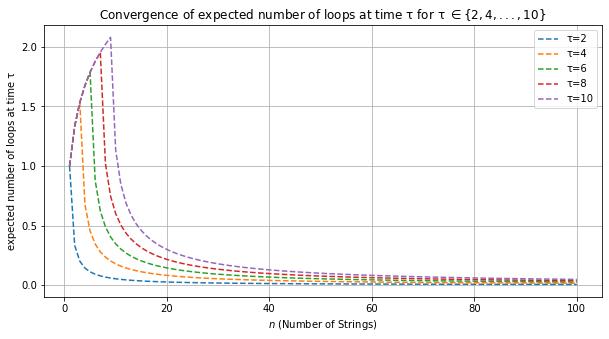

In [120]:
# Set maximum n value to consider
n_max = 100
# Get list of n values up to n_max
n_values_long = list(range(1,n_max+1))

# Create figure
plt.figure(figsize=(10, 5))

# For each tau in {2,4,...,10}, plot the expected value
for tau in range(2,11,2):  
    plt.plot(n_values_long, [calc_E_X_n_tau(n, tau) for n in n_values_long], linestyle='--', label=f"\u03C4={tau}")
    
plt.xlabel("$n$ (Number of Strings)")
plt.ylabel("expected number of loops at time \u03C4")
plt.title("Convergence of expected number of loops at time \u03C4 for \u03C4 $\in \{2,4,...,10\}$")
plt.legend()
plt.grid()
plt.show()

Now we check our approximation of $\eta_n$ for $n=100.$

In [121]:
# Check n=100
# exact calculation
eta_100 = calc_eta_formula(100)
print(f"eta_100 = {eta_100}")

# approximation
approx_eta_100 = 0.5 * (np.log(4 * 100) + 0.577)
print(f"eta_100 approximation: {approx_eta_100}")

eta_100 = 3.2843421893016322
eta_100 approximation: 3.284232273553991


Finally, we compare the $\eta_n$ to its approximation.

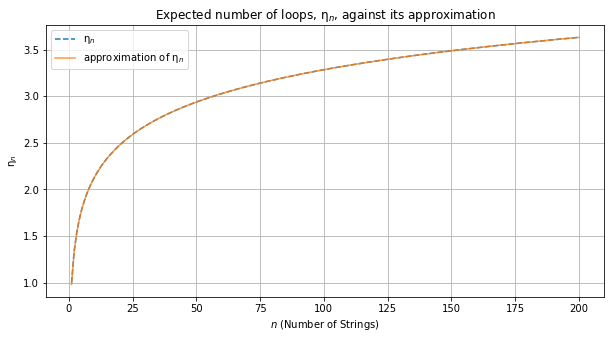

In [129]:
# Set maximum n value to consider
n_max = 200
# Get list of n values up to n_max
n_values_long = list(range(1,n_max+1))

# Create figure
plt.figure(figsize=(10, 5))

# Plot eta_n
plt.plot(n_values_long, [calc_eta_formula(n) for n in n_values_long], linestyle='--', label='\u03B7$_n$')
# Plot approximation
plt.plot(n_values_long, 0.5 * (np.log(4 * np.array(n_values_long)) + 0.577), linestyle='-', label='approximation of \u03B7$_n$', alpha=0.8)
    
plt.xlabel("$n$ (Number of Strings)")
plt.ylabel("\u03B7$_n$")
plt.title("Expected number of loops, \u03B7$_n$, against its approximation")
plt.legend()
plt.grid()
plt.show()